# Importing the Libraries and Dataset

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Importing and viewing the dataset

df = pd.read_excel('C:/Users/navee/Downloads/Country_growth.xlsx')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country Name                            198 non-null    object 
 1   Status                                  196 non-null    object 
 2   Code                                    196 non-null    object 
 3   Year                                    196 non-null    float64
 4   GDP per capita                          196 non-null    float64
 5   Current health exp per capita           196 non-null    float64
 6   Domestic gov health exp per capita      196 non-null    float64
 7   Domestic private health exp per capita  196 non-null    object 
 8   Population                              196 non-null    float64
 9   Life_Expectancy                         196 non-null    float64
 10  Gov exp edu                             196 non-null    float6

In [3]:
#Cleaning the data

df = df.dropna()

# Line Chart

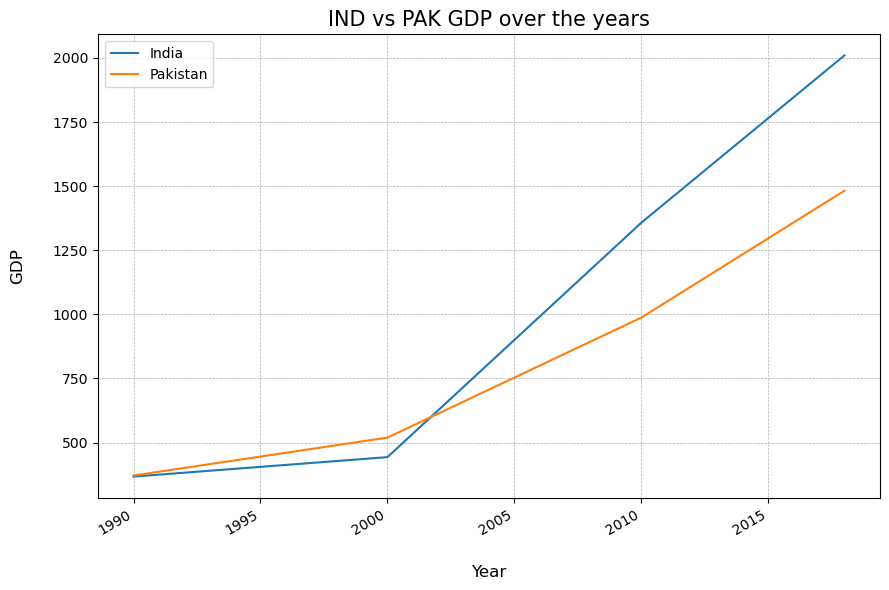

In [4]:
#Taking year-wise GDP for India and Pakistan

ind = df[['Year','GDP per capita']].loc[df['Country Name'] == 'India']

pak = df[['Year','GDP per capita']].loc[df['Country Name'] == 'Pakistan']

#Using Line chart to plot and compare

plt.rcdefaults()
fig, ax = plt.subplots(figsize = (9,6))

ax.plot(ind.Year, ind['GDP per capita'])
ax.plot(pak.Year, pak['GDP per capita'])

ax.set_title('IND vs PAK GDP over the years', fontsize = 15)
ax.legend(['India','Pakistan'])
ax.xaxis.set_label_text('Year', fontsize = 12)
ax.yaxis.set_label_text('GDP', fontsize = 12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

fig.tight_layout()

plt.show()

# Bar Chart

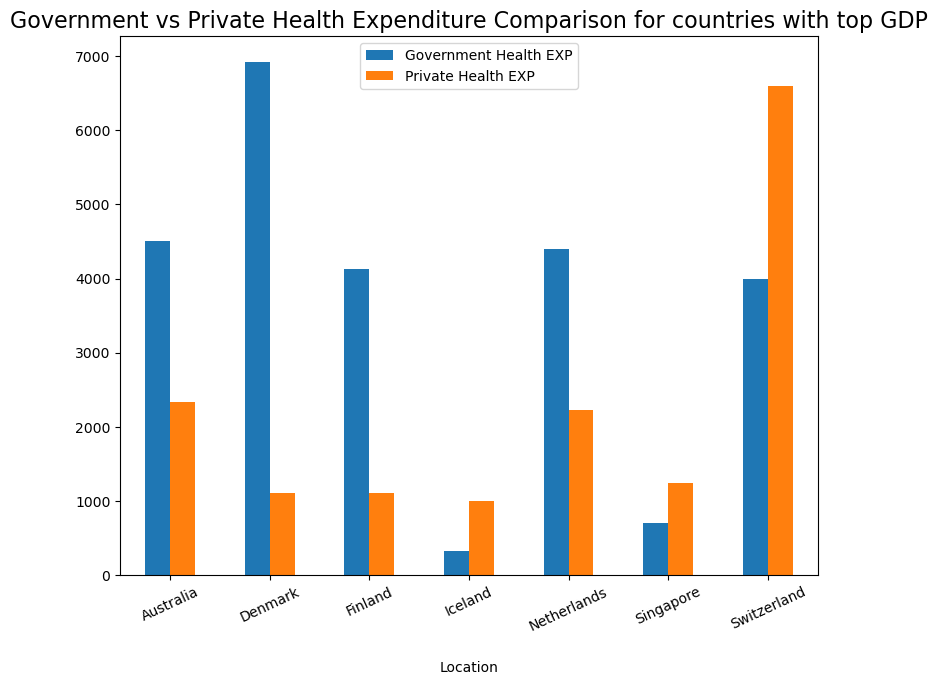

In [5]:
#Identifying countries with Highest GDP in 2018

df1 = df.loc[df['GDP per capita'] > 50000]
df1 = df1.loc[df['Year'] == 2018]

#Plotting Government vs Private Health Expenditure for them using Bar chart

plt.style.use("seaborn-v0_8")
plt.rcdefaults()

fig, ax = plt.subplots(figsize = (9,7))
plt.ticklabel_format(style = 'plain')

df1.plot.bar(x = 'Country Name', y = ['Domestic gov health exp per capita', 
                                      'Domestic private health exp per capita'], rot = 25, ax = ax)

ax.set_title("Government vs Private Health Expenditure Comparison for countries with top GDP", fontsize = 16)
ax.set( xlabel = "Location");

plt.legend(['Government Health EXP','Private Health EXP']);
ax.xaxis.labelpad = 20

# Pie Chart

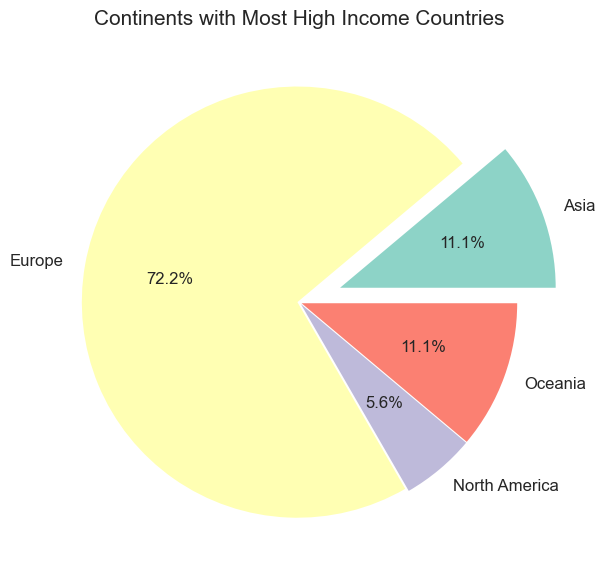

In [6]:
#Identifying Continents with most High income countries

df2 = df[['Continent','Status']].loc[df['Status'] == 'Higher Income']
df2 = df2.groupby(['Continent'], as_index=False)['Status'].count()

#Plotting the same using Pie chart

plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize = (7,7))

ax.pie(df2['Status'].values, labels = df2['Continent'], 
       textprops={'size': 12}, explode=(0.2, 0.01, 0.01, 0.01),
       colors=sns.color_palette('Set3'),
       autopct='%.1f%%')

ax.set_title("Continents with Most High Income Countries", fontsize=15);

# Horizontal Bar Chart

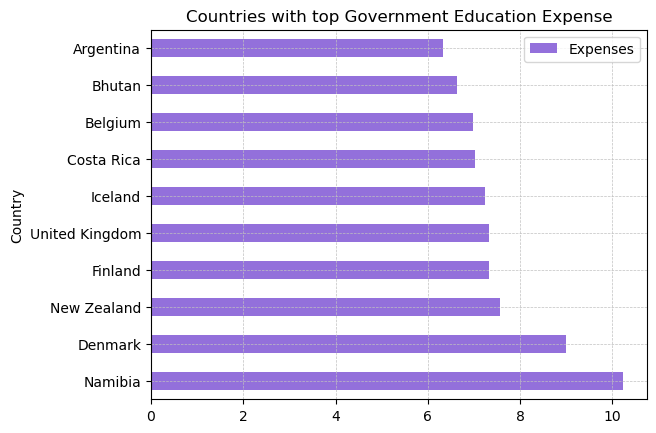

In [7]:
#Countries with top Government Education Expense

df3 = df.groupby(['Country Name'], as_index=False)['Gov exp edu'].max().sort_values('Gov exp edu'
                                                                                        , ascending = False).head(10)

#Plotting the same using bar chart

plt.style.use("seaborn-v0_8")

plt.rcdefaults()
df3.plot.barh(x = 'Country Name', y = 'Gov exp edu', color='mediumpurple')
plt.title("Countries with top Government Education Expense")
plt.legend(['Expenses']);
plt.ylabel('Country')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color = 'silver')

ax.yaxis.labelpad = 40

# Scatter plot

In [8]:
#Checking if any two of the coulmns are positively / negatively correlated

df.corr(numeric_only = True)

,Year,GDP per capita,Current health exp per capita,Domestic gov health exp per capita,Population,Life_Expectancy,Gov exp edu
Year,1.000000,0.288644,0.300499,-0.098570,0.056514,0.317412,0.475204
GDP per capita,0.288644,1.000000,0.936391,-0.049144,-0.153115,0.654338,0.541703
Current health exp per capita,0.300499,0.936391,1.000000,-0.039647,-0.132219,0.592139,0.533229
Domestic gov health exp per capita,-0.098570,-0.049144,-0.039647,1.000000,-0.023944,-0.002496,-0.111338
Population,0.056514,-0.153115,-0.132219,-0.023944,1.000000,-0.116845,-0.025857
Life_Expectancy,0.317412,0.654338,0.592139,-0.002496,-0.116845,1.000000,0.481912
Gov exp edu,0.475204,0.541703,0.533229,-0.111338,-0.025857,0.481912,1.000000


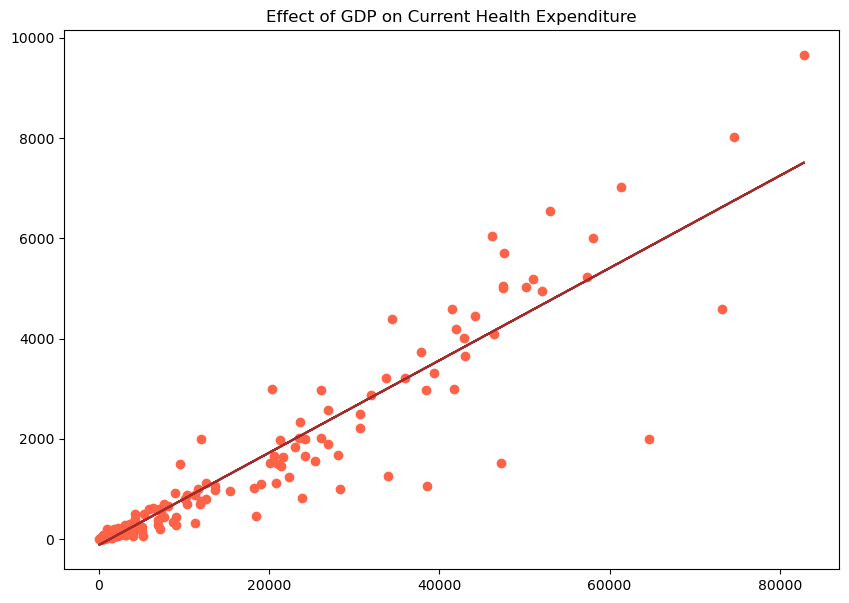

In [9]:
# Scatter plot between GDP & Current Health Expenditure since they are positively strongly correlated

plt.rcdefaults()

fig, ax = plt.subplots(figsize = (10,7))

m, b = np.polyfit(df['GDP per capita'], df['Current health exp per capita'], 1)
ax.plot(df['GDP per capita'], m * df['GDP per capita'] + b, color='brown')


ax.scatter(df['GDP per capita'], df['Current health exp per capita'], color = 'tomato', marker = 'o')
ax.set_title("Effect of GDP on Current Health Expenditure")
ax.yaxis.set_label('Current Health Expenditure')
ax.xaxis.set_label('GDP')
plt.show()
